# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_df = pd.DataFrame({"City": cities})
weather_df

,City
0,yokadouma
1,kapaa
2,ust-kamchatsk
3,nelson bay
4,cayenne
...,...
602,anchorage
603,tecoanapa
604,ocala
605,maua


In [4]:
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Humidity"] = ""
weather_df["Lat"] = ""
weather_df["Lng"] = ""
weather_df["Max Temp"] = ""
weather_df["Wind Speed"] = ""

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,yokadouma,,,,,,,,
1,kapaa,,,,,,,,
2,ust-kamchatsk,,,,,,,,
3,nelson bay,,,,,,,,
4,cayenne,,,,,,,,


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


parameters = {"units": units,
             "appid": weather_api_key}

print("Beginning Data Retrieval")
print("-----------------------------")

for index, row in weather_df.iterrows():
    parameters["q"] = row["City"]
    response = requests.get(url, params=parameters).json()
    
    try:        
        weather_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[index, "Country"] = response["sys"]["country"]
        weather_df.loc[index, "Date"] = response["dt"]
        weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        weather_df.loc[index, "Lat"] = response["coord"]["lat"]
        weather_df.loc[index, "Lng"] = response["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        
        print(f"Processing Record {index} | {row['City']}")
              
    except (KeyError, IndexError):
              print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 | yokadouma
Processing Record 1 | kapaa
City not found. Skipping...
Processing Record 3 | nelson bay
Processing Record 4 | cayenne
Processing Record 5 | upernavik
Processing Record 6 | sistranda
Processing Record 7 | kudahuvadhoo
City not found. Skipping...
Processing Record 9 | bredasdorp
Processing Record 10 | geraldton
City not found. Skipping...
Processing Record 12 | saint george
Processing Record 13 | busselton
Processing Record 14 | sibolga
Processing Record 15 | chokurdakh
Processing Record 16 | coihaique
Processing Record 17 | bengkulu
Processing Record 18 | baykit
Processing Record 19 | hobart
City not found. Skipping...
Processing Record 21 | ushuaia
Processing Record 22 | chiredzi
Processing Record 23 | bay roberts
Processing Record 24 | port blair
Processing Record 25 | abu samrah
Processing Record 26 | marsh harbour
Processing Record 27 | avarua
Processing Record 28 | mataura
Processing Record 29 |

Processing Record 250 | nanortalik
City not found. Skipping...
Processing Record 252 | richards bay
Processing Record 253 | troitskoye
Processing Record 254 | rawson
Processing Record 255 | balud
Processing Record 256 | borgarnes
Processing Record 257 | hithadhoo
Processing Record 258 | zapolyarnyy
City not found. Skipping...
Processing Record 260 | punta alta
Processing Record 261 | kargasok
Processing Record 262 | lagoa
Processing Record 263 | sobolevo
Processing Record 264 | buala
Processing Record 265 | tuatapere
Processing Record 266 | nabire
Processing Record 267 | tsiroanomandidy
Processing Record 268 | saldanha
Processing Record 269 | mabaruma
Processing Record 270 | palmerston
Processing Record 271 | mengcheng
Processing Record 272 | mahon
Processing Record 273 | grand gaube
Processing Record 274 | longyan
Processing Record 275 | zhigansk
City not found. Skipping...
Processing Record 277 | smithers
City not found. Skipping...
Processing Record 279 | aragarcas
Processing Record

Processing Record 501 | bayonet point
Processing Record 502 | leh
City not found. Skipping...
Processing Record 504 | fukue
Processing Record 505 | catamarca
Processing Record 506 | flinders
Processing Record 507 | maceio
Processing Record 508 | hirara
Processing Record 509 | khani
Processing Record 510 | morro bay
Processing Record 511 | bonavista
Processing Record 512 | yar-sale
Processing Record 513 | leshukonskoye
Processing Record 514 | port hedland
Processing Record 515 | north platte
Processing Record 516 | tawang
Processing Record 517 | vestmanna
Processing Record 518 | sohagpur
Processing Record 519 | grand-santi
Processing Record 520 | ishigaki
Processing Record 521 | mulege
Processing Record 522 | muli
Processing Record 523 | lodja
Processing Record 524 | andenes
Processing Record 525 | cockburn town
Processing Record 526 | atambua
Processing Record 527 | lazurne
Processing Record 528 | svetlogorsk
Processing Record 529 | nadym
Processing Record 530 | vanimo
Processing Recor

In [6]:
weather_df.replace("", "NaN", inplace=True)

weather_df["Cloudiness"] = weather_df["Cloudiness"].astype(float)
weather_df["Date"] = weather_df["Date"].astype(float)
weather_df["Humidity"] = weather_df["Humidity"].astype(float)
weather_df["Lat"] = weather_df["Lat"].astype(float)
weather_df["Lng"] = weather_df["Lng"].astype(float)
weather_df["Max Temp"] = weather_df["Max Temp"].astype(float)
weather_df["Wind Speed"] = weather_df["Wind Speed"].astype(float)

weather_df.dropna(inplace=True)

weather_df["Cloudiness"] = weather_df["Cloudiness"].astype(int)
weather_df["Humidity"] = weather_df["Humidity"].astype(int)

weather_df.reset_index(drop=True, inplace=True)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [8]:
weather_df.to_csv("Cities.csv")
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,yokadouma,69,CM,1.586051e+09,79,3.52,15.05,69.75,2.13
1,kapaa,75,US,1.586051e+09,78,22.08,-159.32,80.60,11.41
2,nelson bay,0,AU,1.586051e+09,40,-32.72,152.15,73.99,17.22
3,cayenne,40,GF,1.586051e+09,78,4.93,-52.33,80.60,8.05
4,upernavik,0,GL,1.586051e+09,79,72.79,-56.15,9.70,9.55


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [1]:
date = weather_df.loc[0, ["Date"]]
date2 = time.gmtime(date)
date3 = f"({date2[1]}/{date2[2]}/{date2[0]})"

NameError: name 'weather_df' is not defined

#### Latitude vs. Temperature Plot

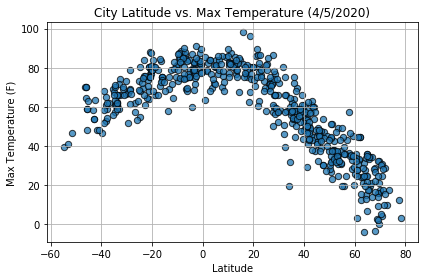

In [10]:
weather_df.plot(kind="scatter", x="Lat", y="Max Temp", title = f"City Latitude vs. Max Temperature {date3}",
                edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

plt.savefig("fig1.png")

Here the maximum temperature of a city on the 5th of April 2020 is plotted against the city's latitude. The trend shows that max temperatures decrease the farther from the equator the city is.

#### Latitude vs. Humidity Plot

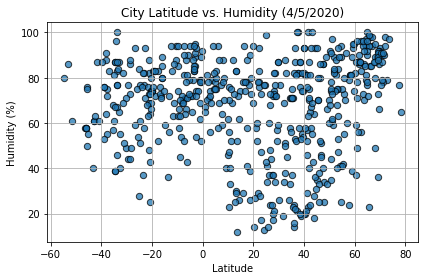

In [11]:
weather_df.plot(kind="scatter", x="Lat", y="Humidity", title=f"City Latitude vs. Humidity {date3}",
               edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

plt.savefig("fig2.png")

Here the humidity of a city on the 5th of April 2020 is plotted against the city's latitude. There doesn't seem to be a strong trend between humidity and latitude.

#### Latitude vs. Cloudiness Plot

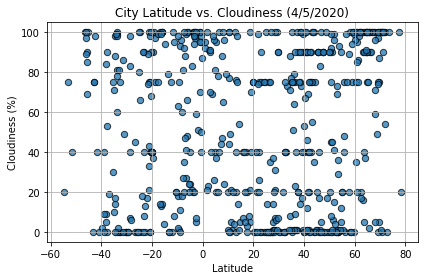

In [12]:
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", title=f"City Latitude vs. Cloudiness {date3}",
               edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()

plt.savefig("fig3.png")

Here the cloudiness of a city on the 5th of April 2020 is plotted against the city's latitude. There seems to be horizontal lines along the easily divisible numbers weathermen like to forecast data on.

#### Latitude vs. Wind Speed Plot

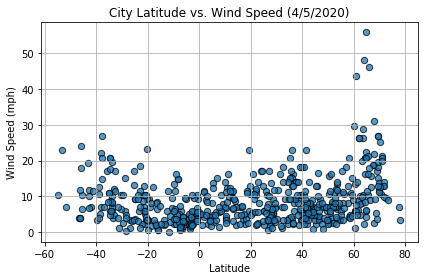

In [13]:
weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", title=f"City Latitude vs. Wind Speed {date3}",
               edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()

plt.savefig("fig4.png")

Here the wind speed of a city on the 5th of April 2020 is charted against the city's latitude. It appears that higher wind speeds occur farther from the equator.

## Linear Regression

In [29]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0,:]
Southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0,:]

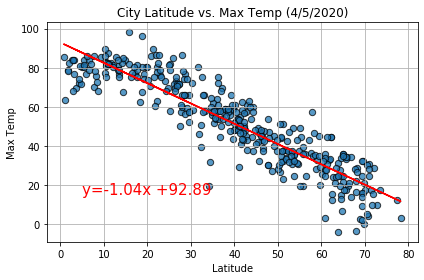

The r-squared is: 0.8279541715788167.


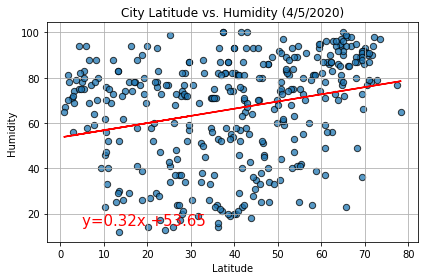

The r-squared is: 0.07265639423279553.


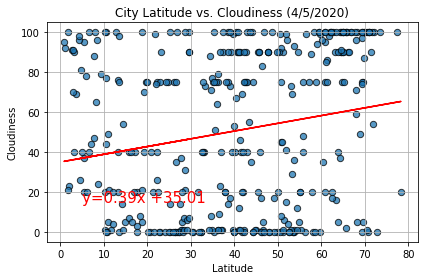

The r-squared is: 0.038293157082951355.


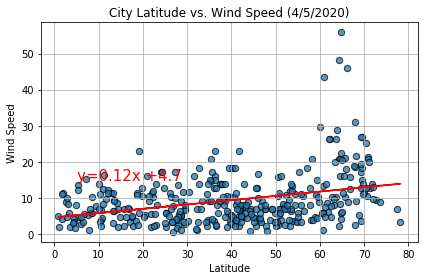

The r-squared is: 0.1096866126252601.


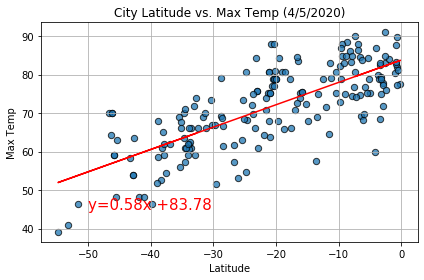

The r-squared is: 0.5669004569456582.


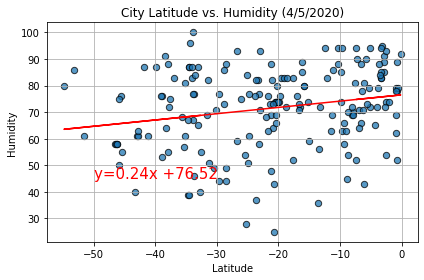

The r-squared is: 0.047575469136349226.


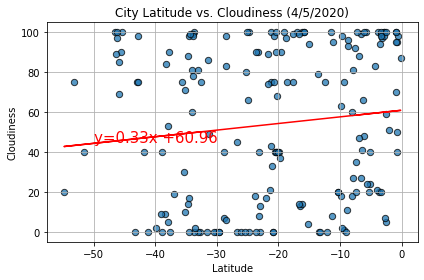

The r-squared is: 0.01434397435128146.


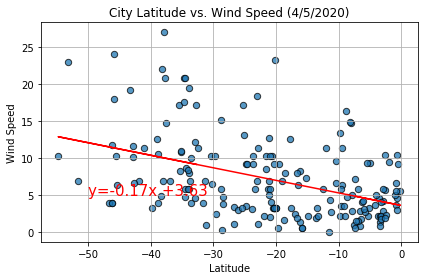

The r-squared is: 0.18404279151153727.


In [33]:
# OPTIONAL: Create a function to create Linear Regression plots
hemispheres = [Northern_hemisphere, Southern_hemisphere]

for hemisphere in hemispheres:
    conditions = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
    for condition in conditions:
        hemisphere.plot(kind="scatter", x="Lat", y=f"{condition}", title = f"City Latitude vs. {condition} {date3}",
                edgecolor="black", s=40, alpha=0.75)
        plt.xlabel("Latitude")
        plt.ylabel(f"{condition}")
        plt.grid()
        plt.tight_layout()

        (slope, intercept, rvalue, pvalue, stderr) = linregress(hemisphere["Lat"], hemisphere[f"{condition}"])
        regress_values = hemisphere["Lat"]*slope + intercept
        line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
        plt.plot(hemisphere["Lat"], regress_values, "r-")
        if hemisphere.iloc[0,0] == Northern_hemisphere.iloc[0,0]:
            plt.annotate(line_eq, (5,15), fontsize=15, color="red")
        elif (hemisphere.iloc[0,0] == Southern_hemisphere.iloc[0,0]) & (condition != "Wind Speed"):
            plt.annotate(line_eq, (-50,45), fontsize=15, color="red")
        else:
            plt.annotate(line_eq, (-50,5), fontsize=15, color="red")
            
        plt.show()
        
        print(f"The r-squared is: {rvalue**2}.")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

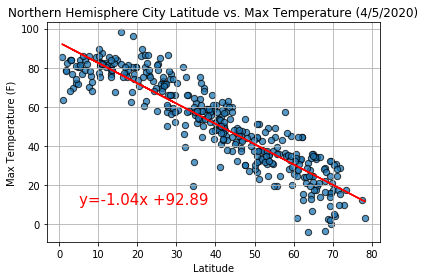

The r-squared is: 0.8279541715788167.


In [61]:
Northern_hemisphere.plot(kind="scatter", x="Lat", y="Max Temp",
                         title = f"Northern Hemisphere City Latitude vs. Max Temperature {date3}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_hemisphere["Lat"], Northern_hemisphere["Max Temp"])
regress_values = Northern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Northern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (5,10), fontsize=15, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}.")

Here cities in the northern hemisphere have their maximum temperatures on April 5th 2020 charted against their latitude. The trend shows that the farther from the equator a city is the lower its maximum temperature

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

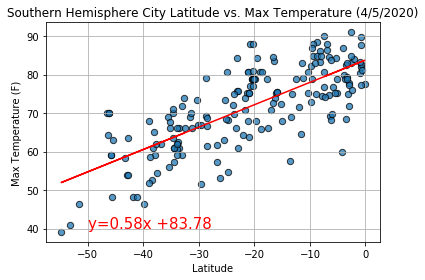

The r-squared is: 0.5669004569456582.


In [62]:
Southern_hemisphere.plot(kind="scatter", x="Lat", y="Max Temp",
                         title = f"Southern Hemisphere City Latitude vs. Max Temperature {date3}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern_hemisphere["Lat"], Southern_hemisphere["Max Temp"])
regress_values = Southern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Southern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50,40), fontsize=15, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}.")

Here cities in the southern hemisphere have their maximum temperature on April 5th 2020 charted against their latitude. The trend shows higher maximum temperatures closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

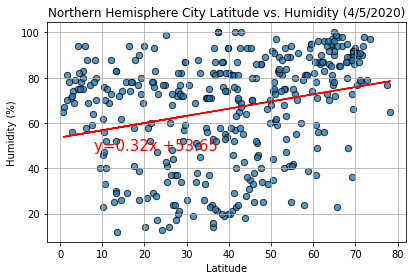

The r-squared is: 0.07265639423279553.


In [63]:
Northern_hemisphere.plot(kind="scatter", x="Lat", y="Humidity",
                         title = f"Northern Hemisphere City Latitude vs. Humidity {date3}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_hemisphere["Lat"], Northern_hemisphere["Humidity"])
regress_values = Northern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Northern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (8,48), fontsize=15, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}.")

Here cities in the northern hemisphere have their humidity on April 5th 2020 charted against their latitude. There doesn't seem to be a strong trend between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

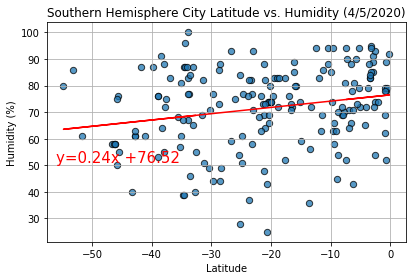

The r-squared is: 0.047575469136349226.


In [68]:
Southern_hemisphere.plot(kind="scatter", x="Lat", y="Humidity",
                         title = f"Southern Hemisphere City Latitude vs. Humidity {date3}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern_hemisphere["Lat"], Southern_hemisphere["Humidity"])
regress_values = Southern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Southern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-56,51), fontsize=15, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}.")

Here cities in the southern hemisphere have their humidity on April 5th 2020 charted against their latitude. There doesn't seem to be a strong trend between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

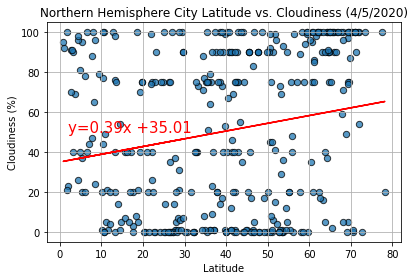

The r-squared is: 0.038293157082951355.


In [70]:
Northern_hemisphere.plot(kind="scatter", x="Lat", y="Cloudiness",
                         title = f"Northern Hemisphere City Latitude vs. Cloudiness {date3}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_hemisphere["Lat"], Northern_hemisphere["Cloudiness"])
regress_values = Northern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Northern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (2,50), fontsize=15, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}.")

Here cities in the northern hemisphere have their cloud coverage on April 5th 2020 plotted against their latitude. There seems to be horizontal groupings of data along easily chosen estimates for cloud coverage.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

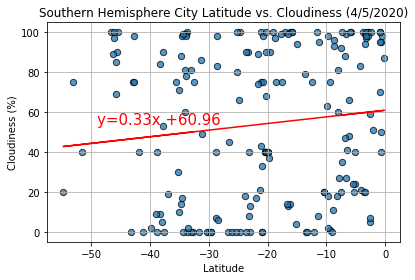

The r-squared is: 0.01434397435128146.


In [73]:
Southern_hemisphere.plot(kind="scatter", x="Lat", y="Cloudiness",
                         title = f"Southern Hemisphere City Latitude vs. Cloudiness {date3}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern_hemisphere["Lat"], Southern_hemisphere["Cloudiness"])
regress_values = Southern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Southern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-49,54), fontsize=15, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}.")

Here cities in the southern hemisphere have their cloud coverage on April 5th 2020 plotted against their latitude. There doesn't seem to be a strong correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

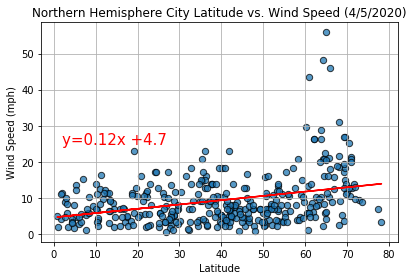

The r-squared is: 0.1096866126252601.


In [78]:
Northern_hemisphere.plot(kind="scatter", x="Lat", y="Wind Speed",
                         title = f"Northern Hemisphere City Latitude vs. Wind Speed {date3}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_hemisphere["Lat"], Northern_hemisphere["Wind Speed"])
regress_values = Northern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Northern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (2,25), fontsize=15, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}.")

Here cities in the northern hemisphere have their wind speed on April 5th 2020 charted against their latitude. There seems to be higher wind speeds farther from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

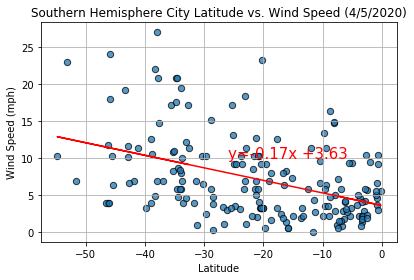

The r-squared is: 0.18404279151153727.


In [82]:
Southern_hemisphere.plot(kind="scatter", x="Lat", y="Wind Speed",
                         title = f"Southern Hemisphere City Latitude vs. Wind Speed {date3}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern_hemisphere["Lat"], Southern_hemisphere["Wind Speed"])
regress_values = Southern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Southern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-26,10), fontsize=15, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}.")

Here cities in the southern hemisphere have their wind speed on April 5th 2020 plotted against their latitude. There seems to be higher wind speeds farther from the equator.